## Agentic RAG

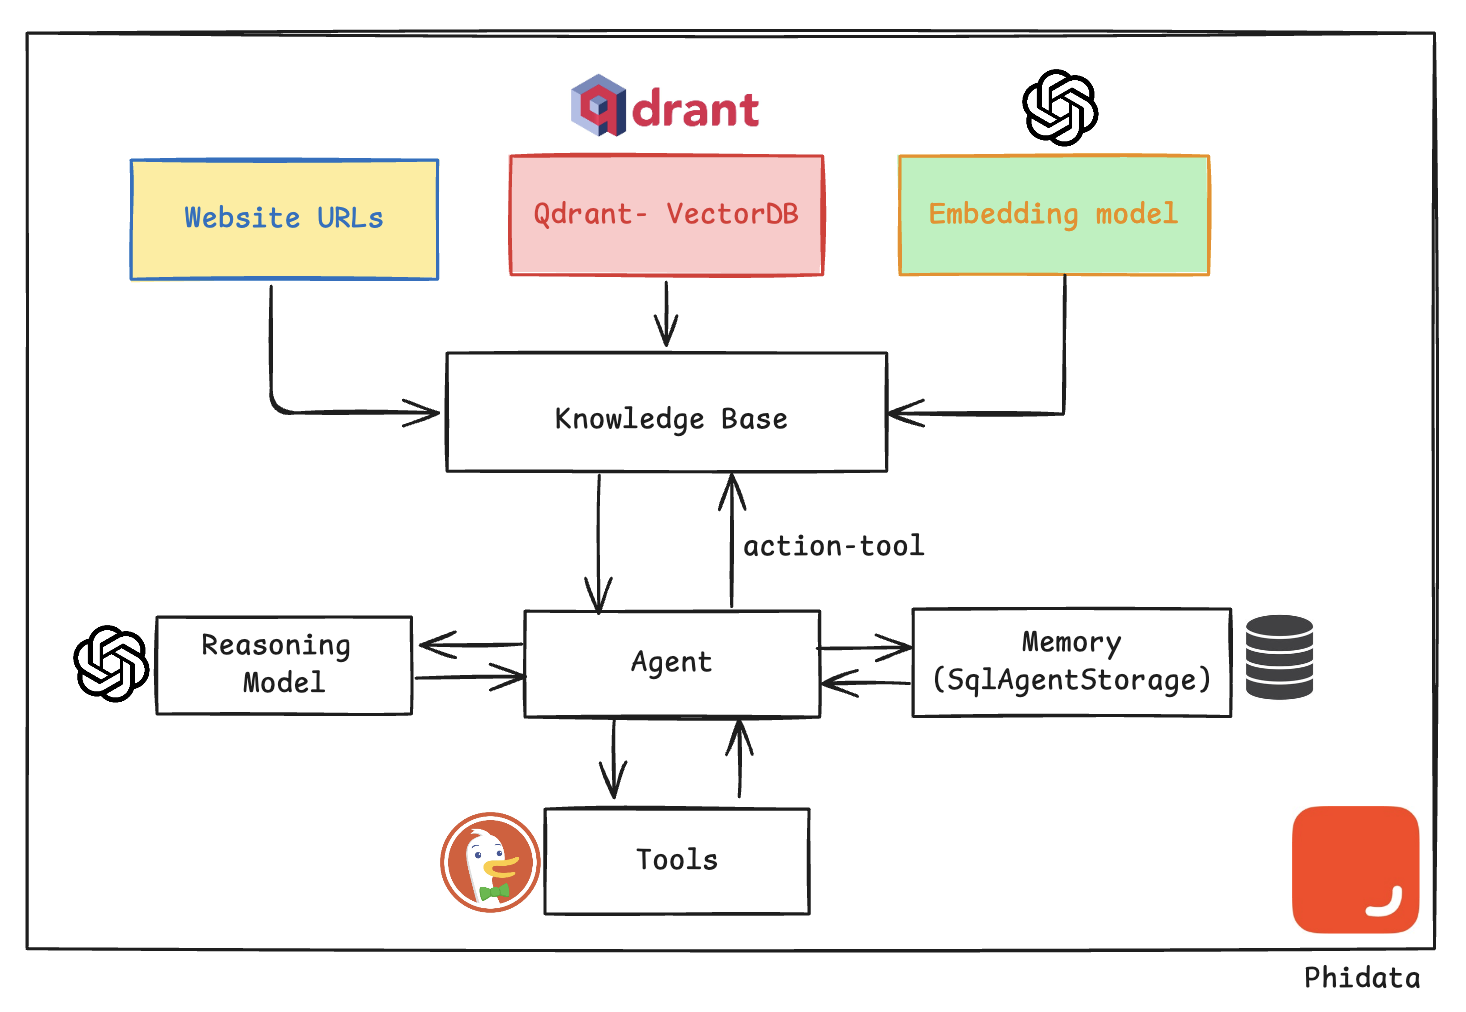

## Installation

In [ ]:
!pip install phidata openai duckduckgo-search qdrant-client

In [ ]:
from getpass import getpass
from phi.knowledge.website import WebsiteKnowledgeBase
from phi.vectordb.qdrant import Qdrant

from phi.agent import Agent
from phi.storage.agent.sqlite import SqlAgentStorage
from phi.model.openai import OpenAIChat
from phi.tools.duckduckgo import DuckDuckGo

## Define Vector Database Qdrant

- Create cluster: https://cloud.qdrant.io/
- Give a name to your cluster and copy the API key
- Get the URL from the curl command under usage example

In [ ]:
COLLECTION_NAME = "agentic-rag"
QDRANT_URL = "<replace>"
QDRANT_API_KEY = "<replace>"

In [ ]:
vector_db = Qdrant(
    collection=COLLECTION_NAME,
    url=QDRANT_URL,
    api_key=QDRANT_API_KEY,
)

## Setup OpenAI API key for embedder model and Reasoning Model

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = getpass("Enter OpenAI API key:")

Enter OpenAI API key:··········


## Define Knowledge Base

In [ ]:
knowledge_base = WebsiteKnowledgeBase(
    urls = ["https://qdrant.tech/documentation/overview/"],
    max_links = 10,
    vector_db = vector_db,
)

In [ ]:
knowledge_base.load() # only run once, after the collection is created, comment this

INFO     Loading knowledge base

INFO     Loaded 15 documents to knowledge base

## Build Agent

In [ ]:
agent = Agent(
    model=OpenAIChat(id="gpt-4o"),
    knowledge=knowledge_base,
    tools=[DuckDuckGo()],

    show_tool_calls=True,
    markdown=True,

    storage=SqlAgentStorage(table_name="agentic_rag", db_file="agents_rag.db"),
    add_history_to_messages=True,
)

In [ ]:
agent.print_response("what are the indexing techniques mentioned in the document?", stream=True)

Output()

In [ ]:
agent.print_response("who is Virat Kohli?", stream=True)

Output()